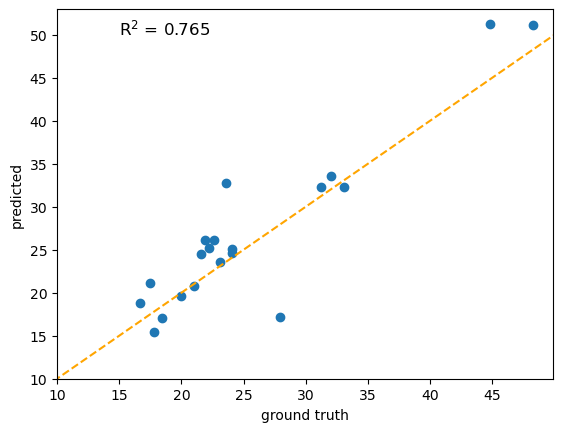

In [3]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
 
df = pd.read_csv('../datafiles/Boston.csv')
 
crime = pd.get_dummies(df['CRIME'], drop_first = True, dtype=int)
df2 = pd.concat([df, crime], axis = 1)
df2 = df2.drop(['CRIME'], axis = 1)
 
train_val, test = train_test_split(df2,test_size = 0.2, random_state = 0)
 
train_val_mean = train_val.mean() # 各列の平均値の計算
train_val2=train_val.fillna(train_val_mean) # 平均値で穴埋め
 
# RMの外れ値
out_line1 = train_val2[(train_val2['RM'] < 6) &(train_val2['PRICE'] > 40)].index
# PTRATIOの外れ値
out_line2 = train_val2[(train_val2['PTRATIO'] > 18) &(train_val2['PRICE'] > 40)].index
# 外れ値を削除
train_val3 = train_val2.drop([out_line1[0]], axis = 0)
 
# 学習用データフレームを特徴量と正解データに分離
col =['RM', 'LSTAT', 'PTRATIO']
x = train_val3.loc[:,col]
t = train_val3[['PRICE']]
 
# RM2乗のシリーズを新しい列として追加
x['RM2'] = x['RM'] ** 2
# LSTAT 列の2乗を追加
x['LSTAT2'] = x['LSTAT'] ** 2
# PTRATIO列の2乗を追加
x['PTRATIO2'] = x['PTRATIO'] ** 2
# 交差作用特徴量を追加
x['RM * LSTAT'] = x['RM'] * x['LSTAT']
# s1, s2 = learn(x, t)
# print(s1, s2)
 
test2 = test.fillna(train_val.mean()) # 欠損値を平均値で補完
# テスト用データフレームを特徴量と正解データに分離
x_test = test2.loc[ :, ['RM','LSTAT', 'PTRATIO'] ]
y_test = test2[['PRICE']]
 
x_test['RM2'] = x_test['RM'] ** 2
x_test['LSTAT2'] = x_test['LSTAT'] ** 2
x_test['PTRATIO2'] = x_test['PTRATIO'] ** 2
x_test['RM * LSTAT'] = x_test['RM'] * x_test['LSTAT']
 
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)
 
sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)
 
sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(y_test)
 
model = LinearRegression()
model.fit(sc_x, sc_y)
# model.score(sc_x_test, sc_y_test)
 
scorestr = r'R$^2$ = {:.3f}'.format(model.score(sc_x_test, sc_y_test))
pred = model.predict(sc_x_test)
 
# 標準化逆変換
plt.scatter(sc_model_y2.inverse_transform(sc_y_test), 
            sc_model_y2.inverse_transform(pred))
 
# 相関グラフ表示
plt.xlabel('ground truth')
plt.ylabel('predicted')
plt.xlim([10, plt.xlim()[1]])
plt.ylim([10, plt.ylim()[1]])
 
plt.text(15, 50, scorestr, fontsize=12)
_ = plt.plot([-100, 100], [-100, 100], color='orange', linestyle='dashed')
 

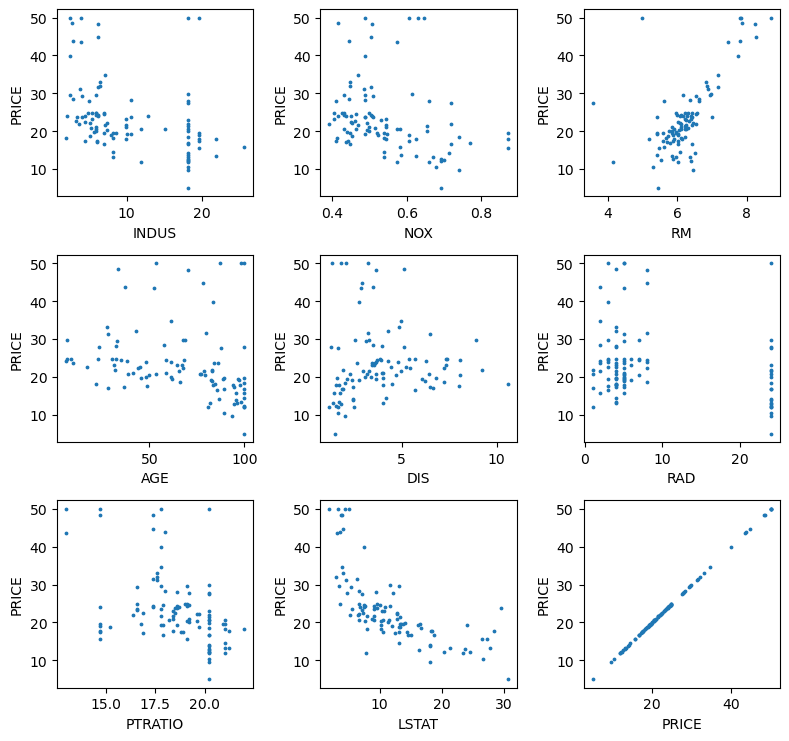

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,12))
# colname = df2.columns
# for name in colname:   
#     train_val2.plot(kind = 'scatter', x = name, y = 'PRICE')
df3 = df2[['INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO','LSTAT', 'PRICE']]
colname = df3.columns
for n, col in enumerate(colname):
    df3.plot(ax=fig.add_subplot(5,3,n+1), kind='scatter', x= col, y='PRICE', s=3)
    
plt.tight_layout()
plt.show()

In [9]:
df3.corr()

,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT,PRICE
INDUS,1.000000,0.803621,-0.421951,0.620097,-0.676479,0.650430,0.282389,0.562670,-0.396040
NOX,0.803621,1.000000,-0.297559,0.698213,-0.757913,0.624347,0.099182,0.507267,-0.286411
RM,-0.421951,-0.297559,1.000000,-0.201136,0.095502,-0.277143,-0.363856,-0.560947,0.686674
AGE,0.620097,0.698213,-0.201136,1.000000,-0.696931,0.402114,0.147185,0.471668,-0.261573
DIS,-0.676479,-0.757913,0.095502,-0.696931,1.000000,-0.470488,-0.083598,-0.380318,0.036360
RAD,0.650430,0.624347,-0.277143,0.402114,-0.470488,1.000000,0.441143,0.317426,-0.245318
PTRATIO,0.282389,0.099182,-0.363856,0.147185,-0.083598,0.441143,1.000000,0.262200,-0.453794
LSTAT,0.562670,0.507267,-0.560947,0.471668,-0.380318,0.317426,0.262200,1.000000,-0.685068
PRICE,-0.396040,-0.286411,0.686674,-0.261573,0.036360,-0.245318,-0.453794,-0.685068,1.000000


In [10]:
# 共分散
# 対角が分散
df3.cov()

,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT,PRICE
INDUS,39.759577,0.568941,-2.044122,109.535841,-8.871088,34.394062,3.458851,24.235310,-23.899067
NOX,0.568941,0.012515,-0.025705,2.148823,-0.176574,0.587349,0.021652,0.388791,-0.308174
RM,-2.044122,-0.025705,0.590265,-4.329022,0.152594,-1.785415,-0.543021,-2.943875,5.048890
AGE,109.535841,2.148823,-4.329022,784.786120,-40.603851,94.441703,8.009452,90.258116,-70.127882
DIS,-8.871088,-0.176574,0.152594,-40.603851,4.325170,-8.205735,-0.337723,-5.402846,0.723684
RAD,34.394062,0.587349,-1.785415,94.441703,-8.205735,69.619254,7.186271,18.182263,-19.682189
PTRATIO,3.458851,0.021652,-0.543021,8.009452,-0.337723,7.186271,3.773344,3.479122,-8.436130
LSTAT,24.235310,0.388791,-2.943875,90.258116,-5.402846,18.182263,3.479122,46.660421,-44.784692
PRICE,-23.899067,-0.308174,5.048890,-70.127882,0.723684,-19.682189,-8.436130,-44.784692,91.588940


In [ ]:
['INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO','LSTAT', 'PRICE']